# Building Functions and Visualizing Distribution

The goal of this project is to access financial market information of 9 different stocks using an API. I'll calculate statistic measures of the close stock prices such as mean, median, standard deviation, etc, then create line graph, scatter plot and histogram visualizations. 

> **Plan** I'll begin by creating a function to calculate the mean, median, variance, standard deviation, covariance, correlation, skewness and kurtosis then, I'll use Stooq API to access stock information for 9 stocks of natural/organic foods grocery stores. I'll then create a few visualizations to analyze the close prices of the stocks.

**1.** **Creating the functions for statistic measures**

In [1]:
lst1 = [1,2,3,4,5]
lst2 = [2,3,8,7,17]
# creating a total function to calculate the sum of a list
def total(lst_obj):
    total = 0
# get the length of the list    
    n = len(lst_obj)
# go throught the entire list, add the next value on the list to the sum of the previous values (cumulative total)    
    for i in range(n):
        total += lst_obj[i]
    return total


# creating a function to calculate the mean of a list
def mean(lst_obj):
    n = len(lst_obj)
# mean is total/n where n is length of the list
    mean_ = total(lst_obj)/n
    return mean_


# creating a function to calculate the median
def median(lst_obj):
    n = len(lst_obj)
# sort the values in the list in an ascending order    
    lst_obj = sorted(lst_obj)
    
# if the length of the list is not even, median = value at the [(n-1)/2]th position   
    if n % 2 != 0:
# find the middle index, (n+1)/2        
        middle_index = int((n-1)/2) 
# find the value that is located at the middle index (median) 
        median_ = lst_obj[middle_index]
    
# if the length of the list is even,     
    else:
        upper_middle_index = int(n/2)
        lower_middle_index = upper_middle_index - 1
        median_ = mean(lst_obj[lower_middle_index : upper_middle_index + 1])
    return median_


# creating a function for variance, we'll assume that the sample represents the population
def variance (lst_obj, sample = False):
# we need the mean of the list to calc the variance    
    lst_mean = mean(lst_obj)
    n = len(lst_obj)
# create a variable we can add the squared difference of x, and x-bar to    
    sum_sq_diff = 0
    
    for val in lst_obj:
        sum_sq_diff += (val - lst_mean)**2
# for population (or if the sample represents the population), we normalize the result by dividng by n        
    if sample == False:
        variance_ = sum_sq_diff / n
# for samples, we normalize by dividing by n-1    
    else:
        variance_ = sum_sq_diff / (n-1)
    return variance_


# creating a function for the standard deviation
def SD(lst_obj, sample = False):
    SD_ = variance(lst_obj, sample) **(1/2)
    return SD_


# we'll need to create a function for covariance because we'll need it to calc the correlation
def covariance(lst_obj1, lst_obj2, sample = False):
# we'll need to determine the mean for each list    
    mean1 = mean(lst_obj1)
    mean2 = mean(lst_obj2)
# create a variable to hold the values of covariance     
    cov = 0
    n1 = len(lst_obj1)
    n2 = len(lst_obj2)
# Check if length of both lists are equal.    
    if n1 == n2:
        n = n1 #if length of both lists are equal, n1 ==n2 so, n = n1 or n = n2
# sum the product of differences, x minus xbar of both lists        
        for i in range(n1):
            cov += (lst_obj1[i] - mean1) * (lst_obj2[i] - mean2)         
        if sample == False:
            cov = cov / n
        else:
            cov = cov / (n-1)
        return cov
    else:
        print("Lists need to be of equal length:", "\n", "length of list 1 =", len(lst1), "\n", \
              "length of list2 =", len(lst2))
        

# create a function for correlation
def correlation(lst_obj1, lst_obj2):
# note that correlation(x,y) = cov(x,y) / (SD (x) * SD(y))
    cov = covariance(lst_obj1, lst_obj2)
    SD1 = SD(lst_obj1)
    SD2 = SD(lst_obj2)
    corr = cov / (SD1 * SD2)
    return corr


# create a function for skewness. skewness determines if the distribution leans to the left or right of the mean.
def skewness(lst_obj, sample = False):
    mean_ = mean(lst_obj)
    SD_   = SD(lst_obj, sample)
# create a variable to hold the values of skewness      
    skew = 0
    n = len(lst_obj)
    for val in lst_obj:
        skew += (val - mean_) **3
        if sample == False:
            skew = skew/(n * SD_ ** 3) 
        else:
            skew = n * skew /((n-1) * (n-2) * SD_ ** 3)
    return skew


# create a function for kurtosis - kurtosis will describe how compressed the distribution is around the mean
# kurtosis also describes how fat the tails of the distribution are
def kurtosis(lst_obj, sample = False):
    mean_ = mean(lst_obj)
    SD_   = SD(lst_obj, sample)
    n     = len(lst_obj)
    kurt = 0
    for val in lst_obj:
        kurt += (val - mean_) **4
    if sample == False:
        kurt = kurt / (n * SD_ **4) 
    else:
        kurt = n * (n+1) * kurt/((n-1) * (n-2) *(n-3) * (SD_**4)) - (3*(n-1)**2) / ((n-2)*(n-3))
    return kurt

In [2]:
print(kurtosis(lst1))

1.6999999999999997


**2.** **Next, I'll create a function that gathers statistics for each variable in a dataframe** 

In [3]:
# the following function will calculate statistics of each variable in a dataframe
def collect_statistics(df, sample = False):
# create an empty dictionary to hold calculated statistic for each variable    
    dct = {key:{} for key in df}
   
    for key, val in df.items():

# remove any missing values        
        val = val.dropna(axis=0)
    
# calc each statistic for each variable
# column name is key and column data is val for df.items()
        dct[key]["mean"]     = round(mean(val), 3)
        dct[key]["median"]   = round(median(val), 3)
        dct[key]["variance"] = round(variance(val), 3)
        dct[key]["SD"]       = round(SD(val), 3)
        dct[key]["skewness"] = round(skewness(val),3)
        dct[key]["kurtosis"] = round(kurtosis(val),3)
    stats_df = pd.DataFrame(dct)
    return stats_df

**3.** **Now, I'll import pandas dictionaries to access nasdaq and Stooq APIs as well as visualizations**

In [4]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import os
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols

In [5]:
# Sometimes publicly traded companies get bought over and lose their stock symbol.
# for example, WFM lost it's stock symbol when it was bought over by Amazon
# so, i need to make sure the stock symbol for each stock is still valid.
# to do that, I'll use nasdaq api to get more information about the stock and if it's still traded
symbols = get_nasdaq_symbols()
print(symbols.loc["GO"])


Nasdaq Traded                                              True
Security Name       Grocery Outlet Holding Corp. - Common Stock
Listing Exchange                                              Q
Market Category                                               Q
ETF                                                       False
Round Lot Size                                              100
Test Issue                                                False
Financial Status                                              N
CQS Symbol                                                  NaN
NASDAQ Symbol                                                GO
NextShares                                                False
Name: GO, dtype: object


In [6]:
# use Stooq API to access stocks of natural grocers
start = datetime.datetime(2012, 1, 1)
end   = datetime.datetime.today()
data_dict ={}
stocks = ["COST", "GO","HAIN", "KR", "NGVC", "SFM", "TGT", "UNFI","WMT"] 
for name in stocks:
    data_dict[name] = web.DataReader(name, "stooq",start, end)
data_dict

{'COST':                 Open      High      Low    Close   Volume
 Date                                                     
 2020-09-25  340.7400  343.7700  335.360  342.580  7338492
 2020-09-24  345.0000  347.3333  338.309  347.000  5779283
 2020-09-23  348.0000  348.2500  344.060  344.630  3577124
 2020-09-22  340.7020  344.9000  339.590  344.450  2128063
 2020-09-21  333.9713  339.6200  333.710  339.570  2427359
 ...              ...       ...      ...      ...      ...
 2012-01-09   63.7130   64.2370   62.502   62.658  6050487
 2012-01-06   65.9080   65.9560   64.331   64.339  4284234
 2012-01-05   66.2730   66.3280   65.109   66.030  4527571
 2012-01-04   67.1470   67.3670   66.621   66.667  2849989
 2012-01-03   66.8450   67.4720   66.741   67.091  2950004
 
 [2198 rows x 5 columns],
 'GO':              Open     High     Low   Close    Volume
 Date                                                
 2020-09-25  38.00  38.7500  37.900  38.490    556043
 2020-09-24  37.60  38.5600  

In [7]:
# data_dict has 5 columns but I'm only interested in the Close price for each stock
# So, I'll make a list that only contains data on the Close column for each stock
lst_close_datas = [val["Close"] for val in data_dict.values()]

# align the column containing Close data with it's key 
data_keys = data_dict.keys()

# concatenate the values in the Close column horizontally
close_data = pd.concat(lst_close_datas, keys = data_keys, axis = 1)
close_data

,COST,GO,HAIN,KR,NGVC,SFM,TGT,UNFI,WMT
Date,,,,,,,,,
2012-01-03,67.091,NaN,18.175,10.528,NaN,NaN,39.412,40.18,48.837
2012-01-04,66.667,NaN,17.660,10.422,NaN,NaN,38.549,39.80,48.334
2012-01-05,66.030,NaN,17.230,10.431,NaN,NaN,37.399,40.31,48.099
2012-01-06,64.339,NaN,17.500,10.387,NaN,NaN,37.740,40.76,47.765
2012-01-09,62.658,NaN,17.615,10.418,NaN,NaN,37.447,40.93,47.907
...,...,...,...,...,...,...,...,...,...
2020-09-21,339.570,37.845,34.870,33.460,9.82,20.61,149.860,17.00,137.070
2020-09-22,344.450,39.430,34.070,33.740,9.81,20.69,154.080,17.23,138.310
2020-09-23,344.630,37.820,33.160,33.280,9.48,20.64,151.010,17.38,135.990


**4.** **Now, i'll import matplotlib to plot my visualizations**

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

**5.** **Visualizations**
>**5.1.** **Line Chart**

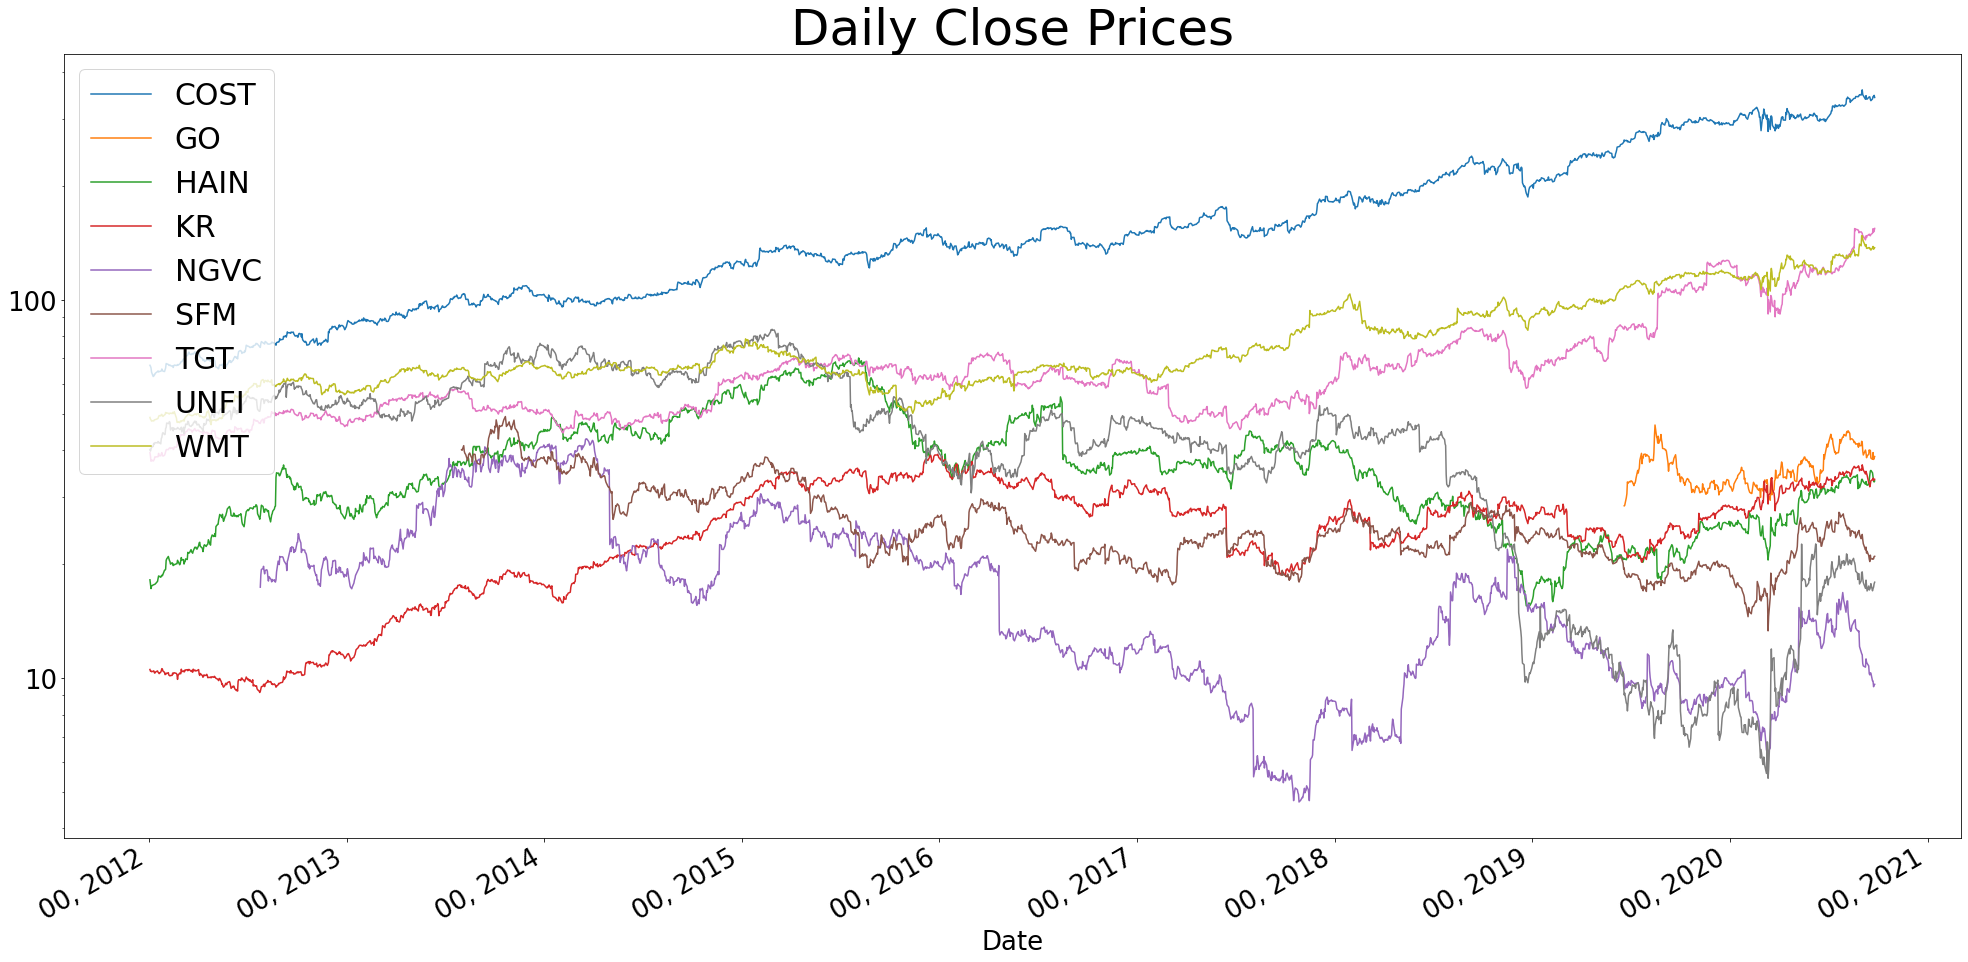

In [17]:
# create a new figure to use for plotting and add a legend
fig, ax = plt.subplots(figsize = (34,16))
close_data.plot.line(ax = ax, legend = True)

# define location for the legend
plt.legend(loc = "upper left", fontsize = "30")

# set default plot font size
plt.rcParams.update({"font.size": 25})

# I'd like to see the price changes in proprotional terms rather than absolute terms so I'll set y-axis as logged
ax.set_yscale("log")

# Now, I'll generate a list of values for the y-axis
y_vals = ax.get_yticks()

# reset y labels to interger rather than scientific notation for e.g. 100 rather than 10^2
reformat_values = [int(y) if y>=1 else round(y,1) for y in y_vals]

# change axis labels with reformat_values
ax.set_yticklabels(reformat_values)

# format values on x-days to mm/yyyy
reformat_x_values = close_data.index
ax.set_xticklabels(close_data.index)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%M, %Y"))

# add a title to the plot
plt.title("Daily Close Prices", fontsize = 50)

# show visualization then delete if from memory after showing it
plt.show()
plt.close()


**As we can see from the graph above, Costco's stocks have been steadily increasing over the last 10 years. Walmart's stock prices has also been on the rise. NGVC (Natural Grocer's) on the other hand has seen alot of downward fluctuations in it's stock prices with it's greatest hits in 2018 and 2020.**

> **5.2. Scatter plot:** It may be useful to see the percent change of the stock prices over time. So, I'll create a time series scatter plot to further analyze the stock prices. 

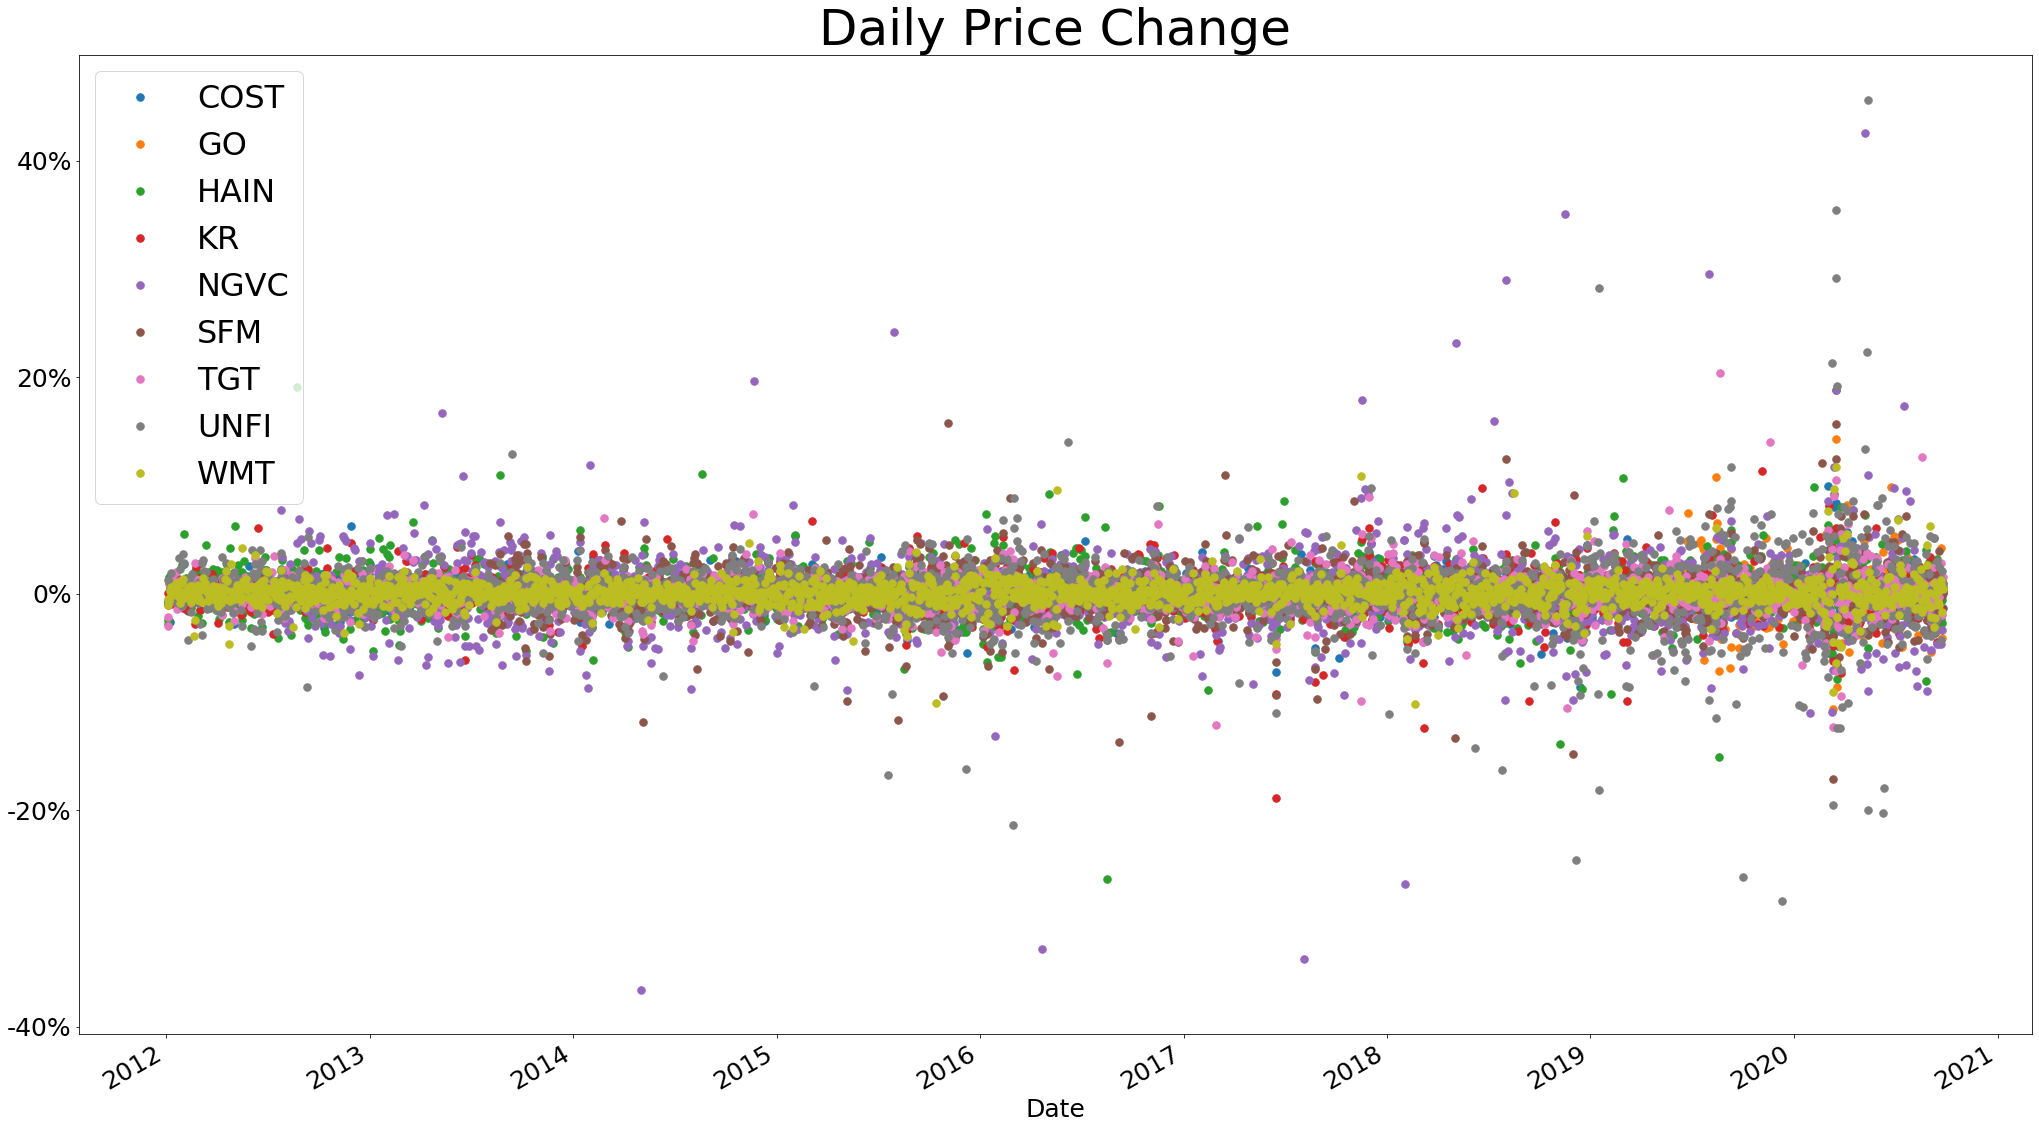

In [10]:
# first, I'll need to convert Close prices to a percent change  
price_change_data = close_data.pct_change() * 100

# create a new fig
fig, ax = plt.subplots(figsize = (35, 20))

# set default font size
plt.rcParams.update({"font.size": 32})

# set the marker for the scatter plot
for key in price_change_data:
    price_change_data[key].plot.line(marker = ".", markersize = 15, ls="", ax=ax)
    
# add a legend
plt.legend(loc = "upper left", fontsize = "32")

# add a title
plt.title("Daily Price Change", fontsize = "50")

# transform values on the y-axis to a string with %
y_vals = ax.get_yticks()
reformat_y_vals = [str(int(y)) + "%" for y in y_vals]
ax.set_yticklabels(reformat_y_vals)

plt.show()
plt.close()



As seen from the scatter plot, Walmart and Costco have much less volatility compared to the other stocks which make them more attractive to a risk-averse investor which may also mean lower returns on investment. Natural Grocer's on the other hand seems to be more a more volatile and riskier stock. 

>**5.3.** **Histogram:** I'd like to visuaze the distribution of price change and include the summary statistics we created earlier

In [11]:
# let's call the summary statistics df which was created earlier
stats_df = collect_statistics(price_change_data)
stats_df

,COST,GO,HAIN,KR,NGVC,SFM,TGT,UNFI,WMT
mean,0.081,0.131,0.050,0.066,0.036,-0.010,0.076,0.019,0.055
median,0.082,0.156,0.037,0.094,0.000,-0.036,0.082,0.042,0.056
variance,1.443,7.595,4.481,2.714,13.001,5.113,2.721,11.129,1.558
SD,1.201,2.756,2.117,1.647,3.606,2.261,1.650,3.336,1.248
skewness,-0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
kurtosis,11.667,6.508,23.373,17.253,36.803,13.079,24.172,40.706,20.808


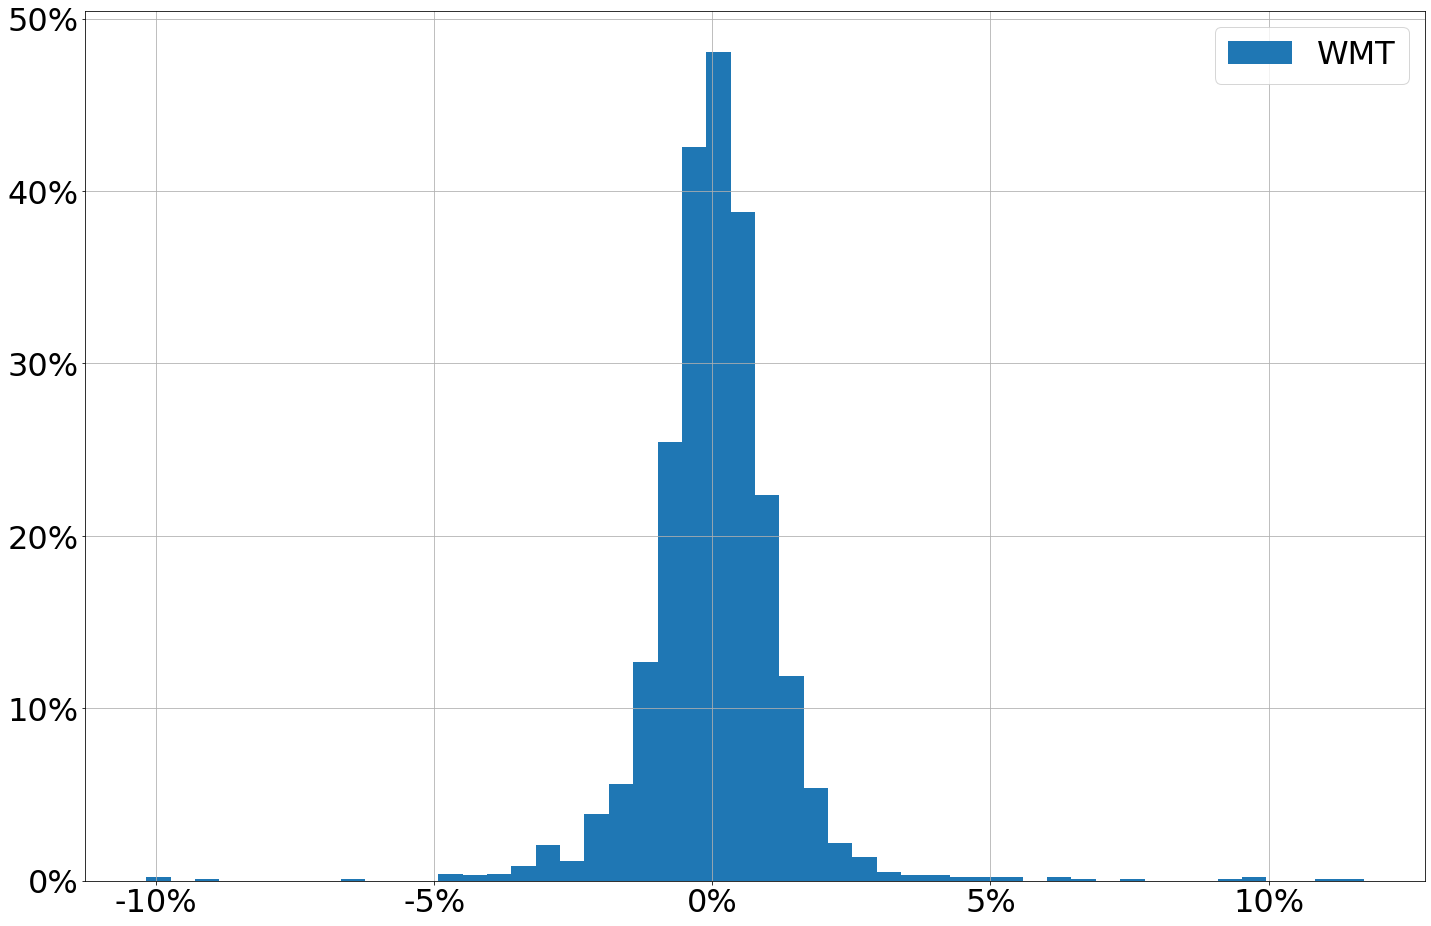

In [12]:
# next, I'll build a histrogram of Walmart stock prices using pandas and matplotlib 
# creating a fig 
fig, ax = plt.subplots(figsize = (24, 16))

# creating a histogram using df.hist()
price_change_data["WMT"].hist(bins = 50, label = "WMT", density = True)

# transform values on the x-axis to a string with %
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])

# transform values on the y-axis to a string with %
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y*100)) + "%" for y in y_vals])

plt.legend()

**As seen on the histrogram, the distribution of walmart stock prices is almost zero but this in itself doesn't reveal much with respect to the other stock prices so now I'll create multiple visualizations which whll make it easy to compare the stock prices.** 

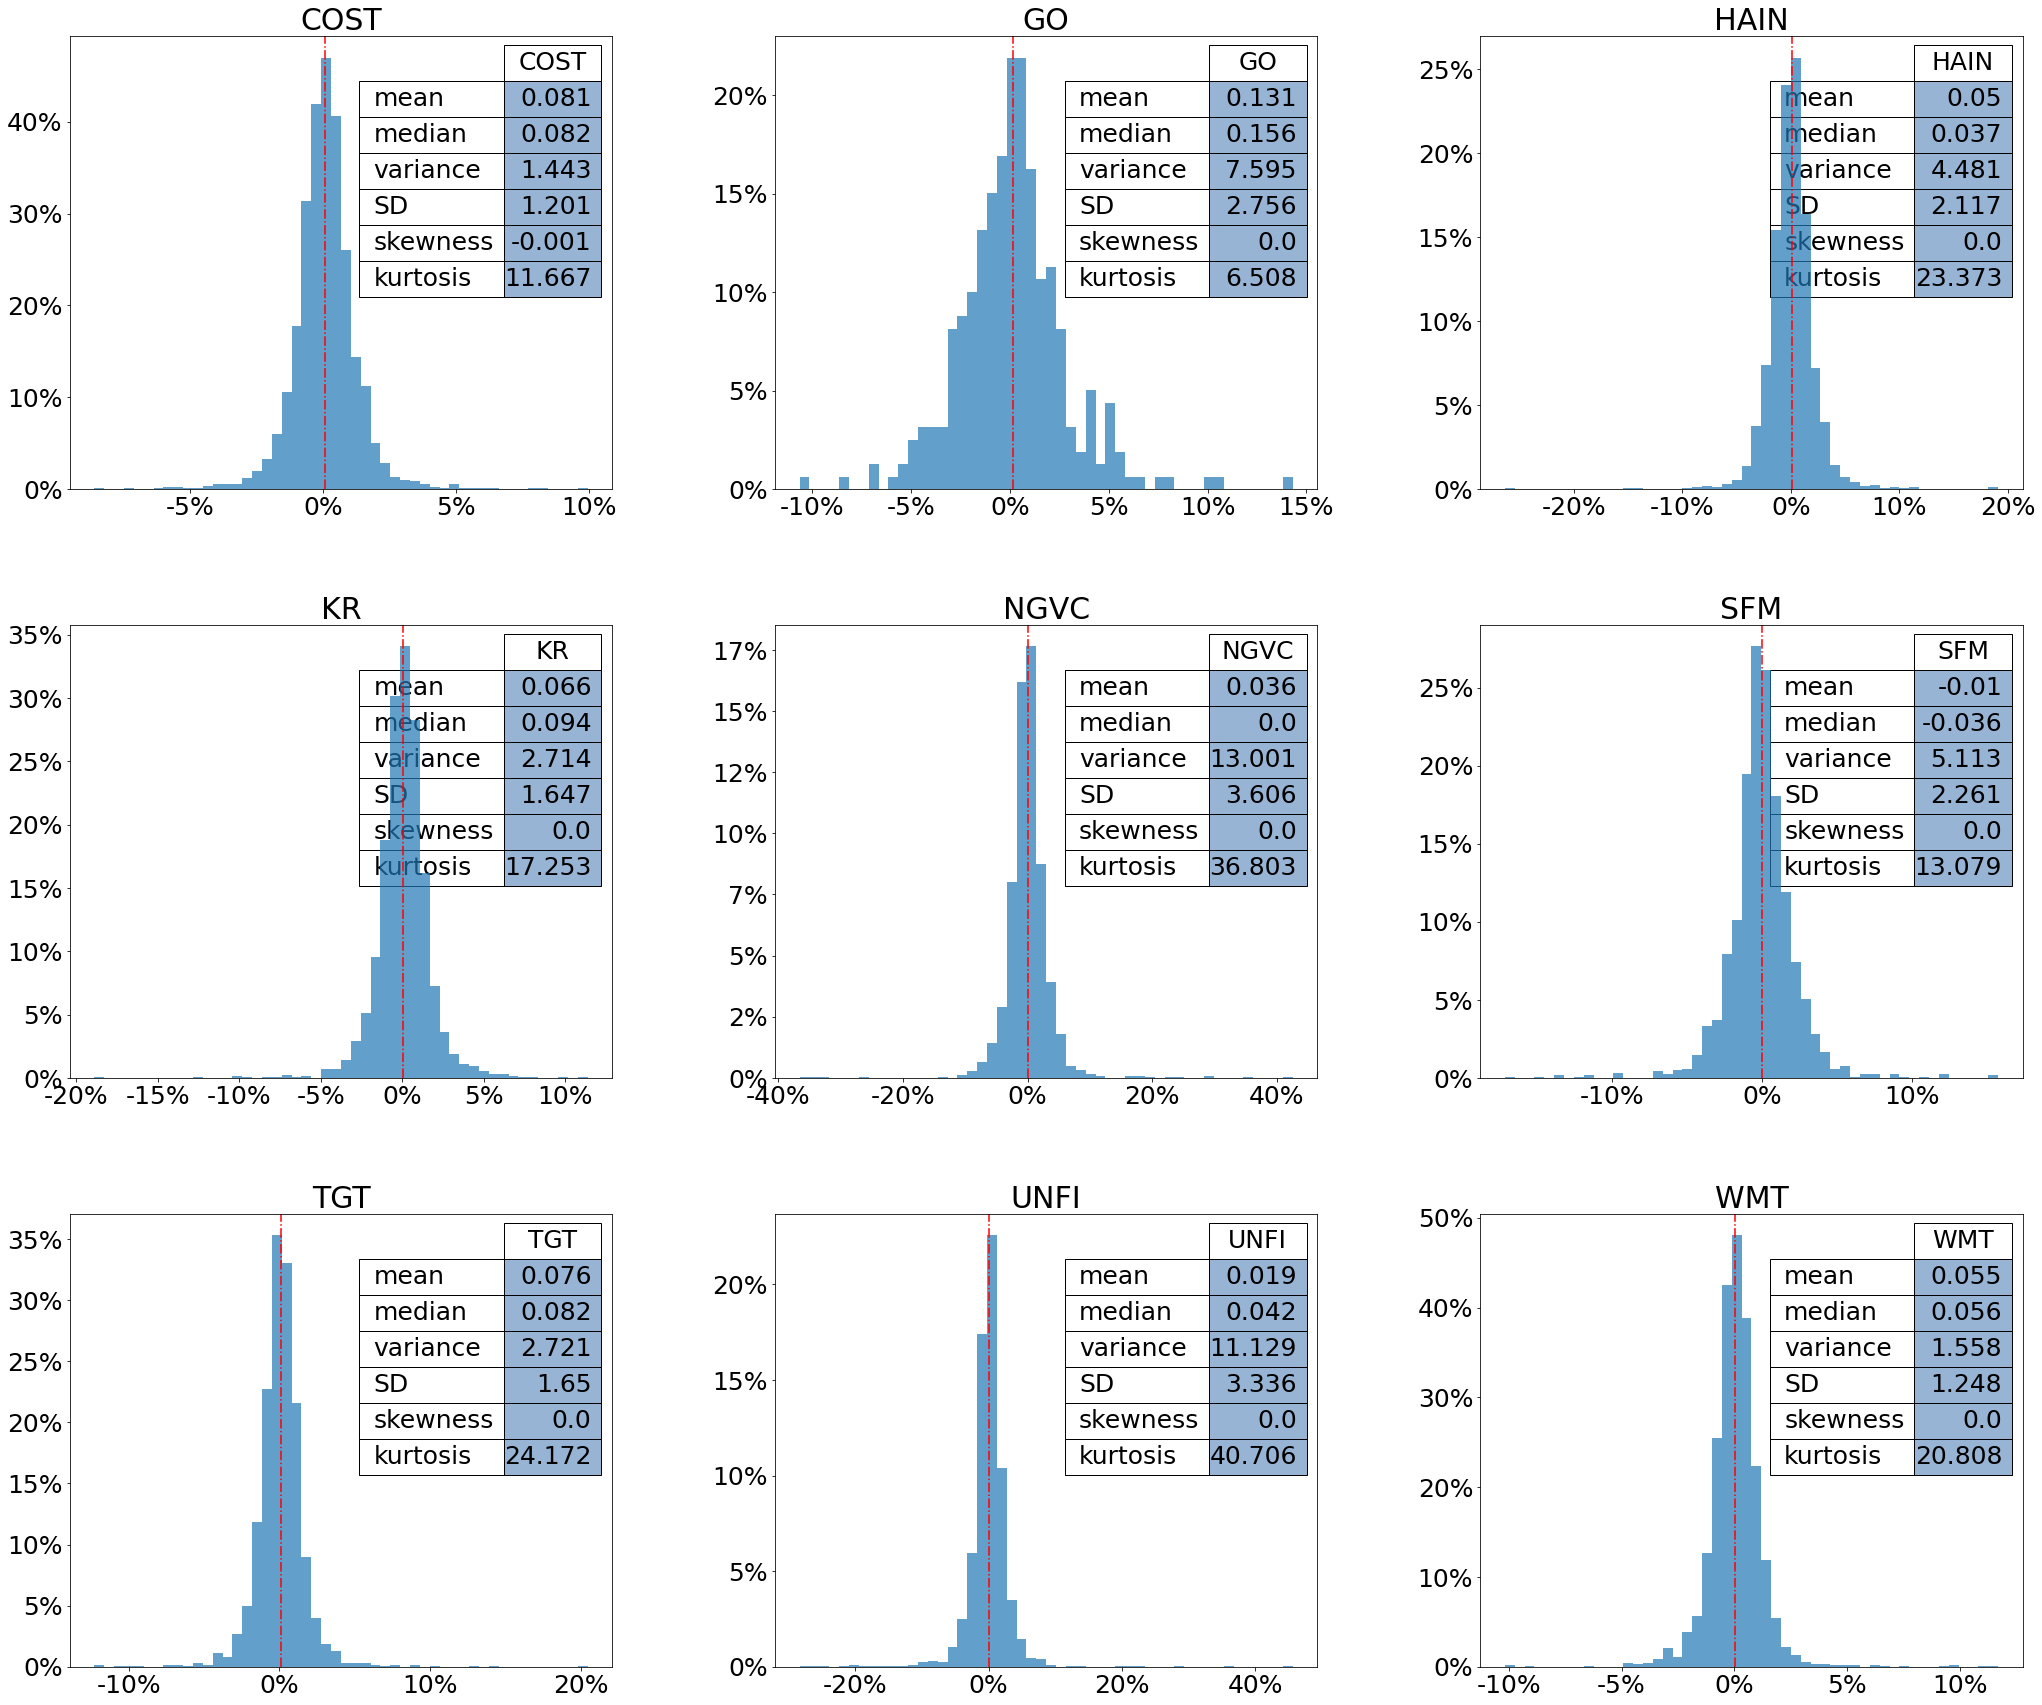

In [32]:
#import table from pandas.plotting to create a table using the df
from pandas.plotting import table

fig, ax = plt.subplots(3,3, figsize = (35, 30))
price_change_data.hist(bins = 50, alpha = 0.7, ax = ax, 
                      label = price_change_data.keys(),
                      density = True)

# add summary statistics to each table
for i in range(len(ax)):
    for j in range(len(ax[i])):
        a = ax[i][j]  
        
# identify stock            
        stock = a.get_title()
# save summary statistics data to table
        summ_data = stats_df[stock]
    
# plot summary statistics within each histogram plot
        stats = table(a, summ_data, colWidths = [0.12],
                         # shade cells that contain output
                         cellColours = [[("#98b4d4")]] * 6, 
                      loc = "upper right")
    
# set the size of the table (xscale, yscale)
        stats.scale(1.5, 3)
    
# turn off default font size for the table
        stats.auto_set_font_size(False)
    
# define a custom fontsize for the table
        stats.set_fontsize(25)
    
# create a vertizle line that indicates the mean of the distribution
        a.axvline(x = summ_data.loc["mean"], ls = "dashdot", color = "r")
    
# transform values on the x and y-axis to a string with %
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x)) + "%" for x in x_vals])
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y*100)) + "%" for y in y_vals])
        
# turn of grid lines
        a.grid(False)

plt.show()
plt.close()

The above visualization makes comparison of all 9 stocks much easier. We see that Costco and Walmart stock prices have the lowest standard deviations while United Natural Foods (UNFI) and Natural Grocers(NGVC) have the highest. Costco and Walmart also have much lower kurtosis making them less risky compared to UNFI and NGVC. Interestingly, Grocery Outlet (GO) has the lowest kurtosis value and it's value for standard deviation is considerably low with respect to the SD of other stocks on the list. 

> Next, let's put all 9 histograms on a single plot and compare their S.D. This should make for a more convenient comparison

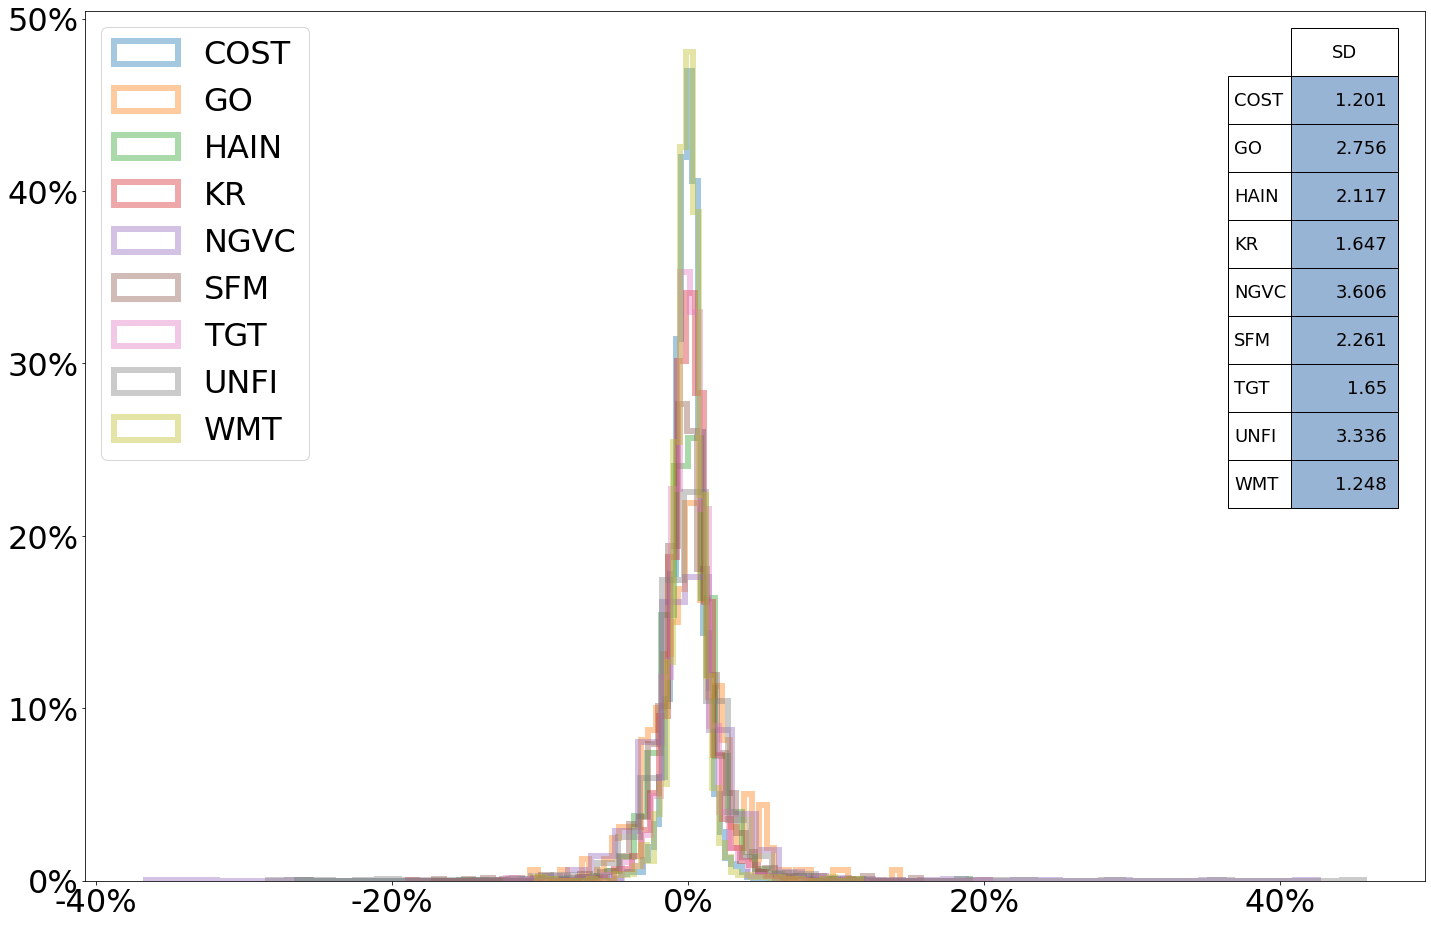

In [14]:
# create a figure
fig, ax = plt.subplots(figsize = (24, 16))

# plot distribution of each price data on the figure
for key in price_change_data:
    price_change_data[key].hist(bins = 50, histtype = "step", alpha = 0.4, 
                                label = key, linewidth = 6, density = True)
    
# set x-values as a percent
x_vals = ax.get_xticks()

# transform values on the x and y-axis to a string with %
x_vals = [str(int(x)) + "%" for x in x_vals]
ax.set_xticklabels(x_vals)

y_vals = ax.get_yticks()
y_vals = [str(int(y * 100)) + "%" for y in y_vals]
ax.set_yticklabels(y_vals)

# add a table with the standard dev. of all 9 stocks
stats = table(ax, stats_df.loc["SD"], colWidths = [0.1], cellColours = [[("#98b4d4")]] * 9, loc = "upper right")

# rescale dimension x and y in table (resize the table)
stats.scale(0.8, 4)

#Turn off auto font size feature
stats.auto_set_font_size(False)

#set a font size
stats.set_fontsize(18)

# turn gridlines off
ax.grid(False)

#legend draws from label values passed in df.hist()
plt.legend(loc = "upper left")
    

With the standard dev. of all 9 stocks plotted together, it's much easier to compare the distribution and standard deviation of each stock. For example, Costco has the smallest SD and it's distribution is much narrower.
> we can also shade the space below each curve to indicate the histogram. This might be more ideal if we aren't comparing too many variables. 

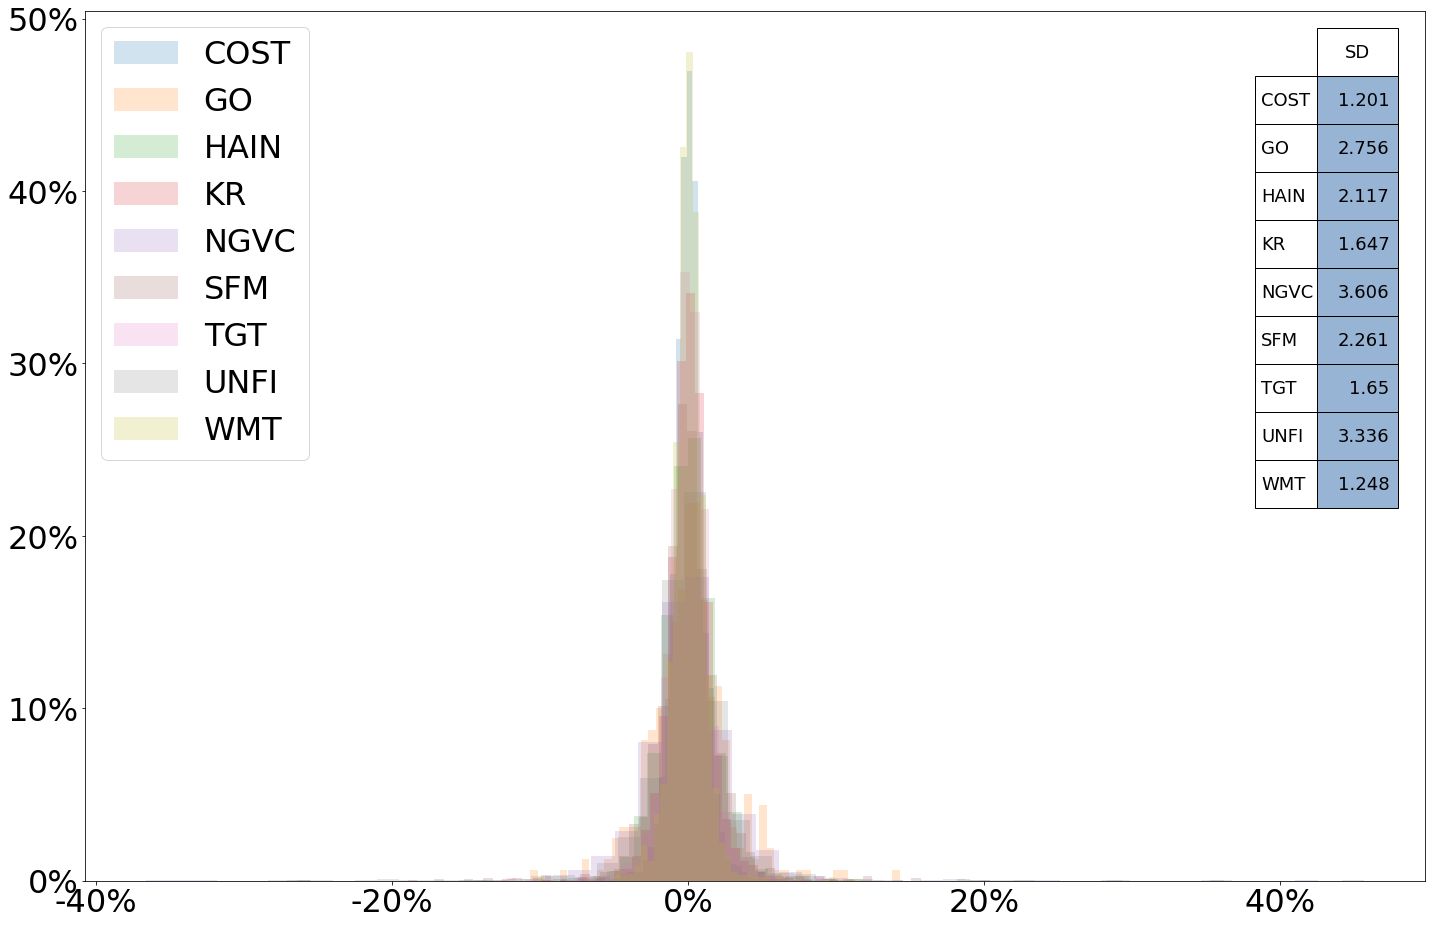

In [15]:
# create a figure
fig, ax = plt.subplots(figsize = (24, 16))

# plot the distribution of each price data on the figure
for key in price_change_data:
    price_change_data[key].hist(bins=50, alpha = 0.2, label = key, density = True) 
    
# set horizontal values as a percent
x_vals = ax.get_xticks()

# transform values on the x and y-axis to a string with %
x_vals = [str(int(x)) + "%" for x in x_vals]
ax.set_xticklabels(x_vals)

y_vals = ax.get_yticks()
y_vals = [str(int(y * 100)) + "%" for y in y_vals]
ax.set_yticklabels(y_vals)

# add a table with the standard dev. of all 9 stocks
stats = table(ax, stats_df.loc["SD"], 
              colWidths = [0.1], 
              cellColours = [[("#98b4d4")]] * 9, 
              loc = "upper right")

# rescale dimension x and y in table (resize the table)
stats.scale(0.6, 4)

#Turn off auto font size feature
stats.auto_set_font_size(False)

#set a font size
stats.set_fontsize(18)

# turn gridlines off
ax.grid(False)

#legend draws from label values passed in df.hist()
plt.legend(loc = "upper left")